# <font color='#31708f'><center>CountVectorizer</center></font>

In [1]:
import glob

In [2]:
file_list = glob.glob('C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman_lockdown/*.json')
for filename in file_list:
    print(filename)

C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman_lockdown\newman-run-report-2021-02-09-13-53-48-837-0-ticketid-upto-59963.json


In [ ]:
import ijson
def parse_json(json_filename):
        with open(filename, 'r', encoding="utf8") as file:
            # load json iteratively
            parser = ijson.parse(file)
            for prefix, event, value in parser:
                print('prefix={}, event={}, value={}'.format(prefix, event, value))
    
if __name__ == '__main__':
    parse_json(filename)

In [3]:
import ijson
import re
from string import punctuation
def extract_ticket_text_generator(json_filename):
    """This function takes a list of files with tickets and extracts text from each ticket. The result is a list of text strings."""
    for filename in file_list:
            with open(filename, 'r', encoding="utf8") as input_file:
                # Extract specific items from the file
                tickets = ijson.items(input_file, 'run.executions.item.assertions.item.assertion')
                for ticket in tickets:
                    # Extract the substring between two markers
                    l = re.findall('plain_body(.+?)public', ticket)
                    #Remove escaped newline '\\n' and non-breaking space 'nbsp' characters
                    m = [re.sub(r'\\n|nbsp', ' ', t) for t in l]
                    # Remove any URL within a string
                    p = [re.sub(r'http\S+|www\S+', '', o) for o in m]          
                    # Remove all of the punctuation in any item in the list. The result is for each ticket a list of comments.
                    q = [''.join(c for c in s if c not in punctuation) for s in p]
                    # Join list elements without any separator. The result is for each ticket a list of merged comments.
                    r = [' '.join(q)] 
                    yield(r)
                
    if __name__ == '__main__':
        extract_ticket_text_generator(filename)

In [4]:
def create_txt_files():
        """This function takes a list of text strings and saves each ticket in a .txt file."""
        data = extract_ticket_text_generator(filename)
        # Make a flat list out of list of lists.
        flat_list = [item for sublist in data for item in sublist]
        for i in range(len(flat_list)):
            with open("ticket_%d.txt" % (i+59047), 'w', encoding="utf-8") as f:
                f.write(flat_list[i])

In [5]:
create_txt_files()

Outside of project scope - create a .txt file with all tickets in it:

In [ ]:
def create_tickets_all_txt_file():
        """This function takes a list of text strings and saves all tickets in a .txt file."""
        data = extract_ticket_text_generator(filename)
        # Make a flat list out of list of lists.
        flat_list = [item for sublist in data for item in sublist]
        with open('ticket_all_lockdown.txt', 'w', encoding="utf-8") as filehandle:
            #Save all elements of a list as a text file:
            for listitem in flat_list:
                filehandle.write('%s\n\n' % listitem)

In [ ]:
create_tickets_all_txt_file()

Outside of project scope above

In [5]:
import json
def extract_all():
        final_list =[]  
        for filename in file_list: 
               with open(filename, 'r', encoding="utf8") as file: 
                   output_json = json.load(file)
                   for (k, v) in output_json.items():
                    if k == "run":
                        executions_values = v["executions"]
                        for ticket in executions_values:
                            single_ticket = ticket
                            for (k1, v1) in single_ticket.items():
                                if k1 == "assertions":
                                    for elem in v1: 
                                        for (k2, v2) in elem.items():
                                            if k2 == 'assertion':
                                                res2 = json.loads(v2)
                                                for (k3, v3) in res2.items():
                                                    if k3 == 'comments':
                                                           for elem1 in v3:
                                                                for (k4, v4) in elem1.items():
                                                                    if k4 == 'body':
                                                                        final_list.append(v4)
        return(final_list)

In [6]:
output = extract_all()

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [11]:
#Create custom list of English stopwords
custom_stopwords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

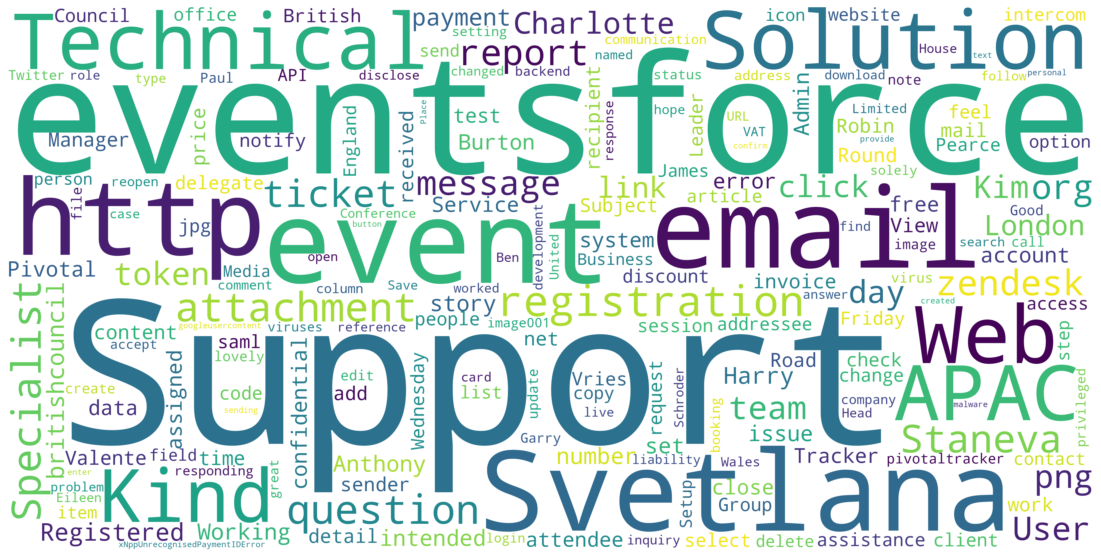

In [22]:
stopwords = set(STOPWORDS)
cloud = WordCloud(stopwords=custom_stopwords,
                      background_color="white",
                      width = 4000,
                      height = 2000,
                      max_words=200, 
                      collocations = False, 
                      min_word_length = 3
                         ).generate(' '.join(output))
    
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()